## Importing data and statistical functions
### Importing Excel data

Excel data is imported with the `import excel` command. The command is is then followed with the path or the webaddress to the data.

The options for the command are separated with `,`. The most important options here are `sheet`, `firstrow` and `cellrange` which determine the sheet where the data is located, whether the variable names are located in the first row and the cell ranges for the data. Stata by default assumes that the data is located in the first sheet and looks for active cells in data.

In this example we download the [Swedish pharmaceutical data](https://www.tlv.se/beslut/sok-i-databasen.html) directly to Stata with follwing command:

In [1]:
import excel using "https://www.tlv.se/file/medprice", firstrow clear // variable names in first row

Let's see what the metadata tells us. Use the `describe` command:

In [2]:
describe _all


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Produktnamn     str50   %50s                  Produktnamn
Varunummer      str6    %9s                   Varunummer
ATCkod          str16   %16s                  ATC-kod
NPLid           str14   %14s                  NPL id
NPLpackid       str14   %14s                  NPL pack-id
Form            str86   %86s                  Form
Styrka          str43   %43s                  Styrka
Förpackning     str142  %142s                 Förpackning
Antal           str9    %9s                   Antal
Företag         str49   %49s                  Företag
AIP             str9    %9s                   AIP
AUP             str9    %9s                

We can also look at the observations in memory wiht the `list` command:

In [3]:
list Produktnamn Företag AIP if _n < 11


       +-----------------------------------------------------------------------------------+
       |                        Produktnamn                              Företag       AIP |
       |-----------------------------------------------------------------------------------|
    1. |           Abacavir/Lamivudin Mylan                             Mylan AB    229,80 |
    2. |         Abacavir/Lamivudine Accord                 Accord Healthcare AB   1199,00 |
    3. |       Abacavir/Lamivudine Glenmark   Glenmark Pharmaceuticals Nordic AB   1410,00 |
    4. | Abacavir/Lamivudine Medical Valley             Medical Valley Invest AB   1400,00 |
    5. |         Abacavir/Lamivudine Sandoz                           Sandoz A/S    190,18 |
       |-----------------------------------------------------------------------------------|
    6. |          Abacavir/Lamivudine STADA                     STADA Nordic ApS   1199,00 |
    7. |           Abacavir/Lamivudine Teva                       Tev

Above, we tell the `list` command to print the variables `Produktnamn`, `Företag` and `AIP` if the observation/row number is less than 21. That is, we ask Stata to print the first 20 values of these variables based on the current sort order. If you want to view the data "like in Excel", you can type `browse` or `br` to the command line.

Having downloaded our data, we can save it on disk. But first, we may want to keep all of our data files within its own folder. We can tell Stata directly to make a new folder (directory) with the `shell` and `mkdir` commands. `Shell` is the common name for the command line of your operating system and `mkdir` is short for *make directory*. `mkdir` works both on Windows and Unix systems and would not even need the command `shell` before it.

The actual file save is done with the `save` command. It's only argument is the path/name of the file relative to the working directory. The data files in Stata have the `.dta` file extension and we can include it also in the argument. Had we not done that, Stata would have understood it anycase. Finally, we include the `replace` option so that Stata can owerwrite if there already exists a file with the same and path. Here I use the same working directory from the [previous materials.](https://jaakkogo.github.io/stata_materials/stata_basics.html)

Notice: the `save` is meant for only `dta` files. If we wanted to save the data in another format, we would neeed to use the `export` command(s).

In [4]:
cd "Z:/ECON-C4100" // change working directory
shell mkdir data // make a new directory for the data
save data/sweden_prices.dta, replace // save the data


Z:\ECON-C4100


file data/sweden_prices.dta saved


Now, having saved the data we can import some text delimited data! Let's clear our memory first.

In [5]:
clear all

In [6]:
describe


Contains data
  obs:             0                          
 vars:             0                          
 size:             0                          
Sorted by: 


### Importing text delimited data

Next, we will import the Finnish pharmaceutical data and modify it so it's ready for your homework exercises. Before doing this yourself, do the following steps:

1. Make a new folder in your ECON-C4100 folder and name it `rawdata`
2. Download the Finnish pharmaceutical data from MyCourses and place it to `ECON-C4100/rawdata`.

The following Stata code does this for you if your working on Windows. Notice that you might need to change the paths for the `copy` commands. My Downloads folder is located under my user profile and my course working directory is located on disk Z.

For Unix (OSX or Linux) users, replace the `copy` with `cp` and the arguments to `~/Downloads/SALVIA.txt location_of_your_wdir`. You can also create the folder and copy the file manually.

In [7]:
shell mkdir rawdata // make new directory
shell copy "%USERPROFILE%\Downloads\SALVIA.txt" "Z:/ECON-C4100/rawdata" // copy file to the new directory

Before importing the data, let's take a look at it in Notepad.

![](figures/salvia_window.png)

The data clearly is "\t" or tab delimited. Notice also that there are no variable names! Don't worry though, the data comes with a data description which tells us which columns are which. More on that later.

The cell in the data has a file identifier attached to it. For general good practice and debugging reasons, we want to keep that. We will next read the data into memory "as it is". We do this with the `import delimited` command. The most important option is `delimiters` which tells Stata which delmiter the data is coded with.

In [8]:
import delimited using "rawdata/SALVIA.txt", delimiter(tab) varnames(nonames) encoding(UTF-16) stringcols(_all) clear
describe


(42 vars, 11,085 obs)


Contains data
  obs:        11,085                          
 vars:            42                          
 size:     7,803,840                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
v1              str29   %29s                  
v2              str7    %9s                   
v3              str1    %9s                   
v4              str5    %9s                   
v5              st

Let's see what the first cell looks like:

In [9]:
list v1 if _n == 1


       +-------------------------------+
       |                            v1 |
       |-------------------------------|
    1. | TAXA: 01/21 PVM: 01.01.2021   |
       +-------------------------------+


How could we save this value for every observation?

We do this by creating a new variable `stamp` with the `generate` command:

In [10]:
gen stamp = v1[1] // new variable that takes the first value of variable v1
describe stamp
tab stamp // list or tabulate all the unique values of stamp




              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
stamp           str29   %29s                  


                        stamp |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
TAXA: 01/21 PVM: 01.01.2021   |     11,085      100.00      100.00
------------------------------+-----------------------------------
                        Total |     11,085      100.00


Notice that we can refer the Stata variable values with indexes starting from 1.

`tabulate` or `tab` is a great command to list all the different values of a variable. We can see that the identifier is now attached to every observation/row. We can count the number of observations in memory with the `count` command:

In [11]:
count

  11,085


Recall that now the first row is useless for us. We can drop it with the `drop` command. It can be used either to drop observations or entire variables. 

In this intro, we will next keep only variable number 2 and 12. Do this with either the `keep` or `drop` command:

In [12]:
drop if _n == 1
keep stamp v2 v12
list if _n < 11


(1 observation deleted)



       +-----------------------------------------------------------------------------------+
       |     v2                                        v12                           stamp |
       |-----------------------------------------------------------------------------------|
    1. | 693986            3,4-DIAMINOPYRIDINE (ERIT.LUPA)   TAXA: 01/21 PVM: 01.01.2021   |
    2. | 695616                 A.T.10 TROPFEN (ERIT.LUPA)   TAXA: 01/21 PVM: 01.01.2021   |
    3. | 810689        A.T.10 TROPFEN (MÄÄRÄAIK.ERIT.LUPA)   TAXA: 01/21 PVM: 01.01.2021   |
    4. | 695604            A.T.10 WEICHKAPSELN (ERIT.LUPA)   TAXA: 01/21 PVM: 01.01.2021   |
    5. | 810688   A.T.10 WEICHKAPSELN (MÄÄRÄAIK.ERIT.LUPA)   TAXA: 01/21 PVM: 01.01.2021   |
       |-----------------------------------------------------------------------------------|
    6. | 882795                   A12T DENATUROITU ETANOLI   TAXA: 01/21 PVM: 01.01.2021   |
    7. | 874206                   A12T DEN

Variable `v2` and variable `v12` give the VNR (id) and the name of a pharmaceutical product. You can look their data descriptions from the pdf file found on MyCourses. Next we will rename them and give them new labels in English. We use the `rename` and `label` commands.

In [13]:
rename v2 vnr // VNR id
label variable vnr "VNR code"
rename v12 product_name // Product name
label variable product_name "Product name"

Let's describe what we got and save the data.

In [14]:
describe _all
save data/finland_pharmaceuticals.dta, replace



              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
vnr             str7    %9s                   VNR code
product_name    str43   %43s                  Product name
stamp           str29   %29s                  

file data/finland_pharmaceuticals.dta saved


In the exercises, you will get to rename all the rest of the variables yourself. Now let us get back to the Swedish data.

### Basic statistical functions with Stata

Start by clearing the memory and then `use` the previously saved data:

In [15]:
clear all // Clear memory
use "data/sweden_prices.dta"
describe _all





              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Produktnamn     str50   %50s                  Produktnamn
Varunummer      str6    %9s                   Varunummer
ATCkod          str16   %16s                  ATC-kod
NPLid           str14   %14s                  NPL id
NPLpackid       str14   %14s                  NPL pack-id
Form            str86   %86s                  Form
Styrka          str43   %43s                  Styrka
Förpackning     str142  %142s                 Förpackning
Antal           str9    %9s                   Antal
Företag         str49   %49s                  Företag
AIP             str9    %9s                   AIP
AUP             str9    %9s             

Notice that all of our variables are in the string format. We want them to be numbers. Let's `destring` the price variables. Because the numbers separated with commas and not dots, we use the `dpcomma` option.

In [16]:
destring AIP* AUP*, replace dpcomma // remember to use the replace command

AIP: all characters numeric; replaced as double
AIPperst: all characters numeric; replaced as double
AUP: all characters numeric; replaced as double
AUPperst: all characters numeric; replaced as double


Notice that Stata did not replace any values if the variable had nonnumeric characters.

Next, let's tabulate some statistics for `AIP` or Apotek Inköp Pris and `AUP` or Apotek Utköp Pris:

In [17]:
tabstat AIP AUP, stats(mean sd p25 p50 p75 max min)
summarize AIP AUP



   stats |       AIP       AUP
---------+--------------------
    mean |    2833.3  2932.512
      sd |  10842.34  10974.33
     p25 |       100    155.69
     p50 |    323.29    381.83
     p75 |   1087.99   1157.31
     max |    255000  256046.3
     min |       .98      31.7
------------------------------


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         AIP |     13,953      2833.3    10842.34        .98     255000
         AUP |     13,953    2932.512    10974.33       31.7   256046.3


We can also also calculate the confidence interval of the means or variance:

In [18]:
ci mean AIP
ci variances AIP



    Variable |        Obs        Mean    Std. Err.       [95% Conf. Interval]
-------------+---------------------------------------------------------------
         AIP |     13,953      2833.3    91.78867        2653.382    3013.218


    Variable |        Obs      Variance       [95% Conf. Interval]
-------------+----------------------------------------------------
         AIP |     13,953      1.18e+08       1.15e+08    1.20e+08


Next we will make a light hearted test if for the mean prices of two different means.

We will sort the data by descending order and divide the data in two. Then we will test if the the two means are statistically significantly different. 

In [19]:
scalar temp = _N/2
gsort -Produktnamn
gen dummy = _n > temp
tab dummy
tabstat AIP, by(dummy) stats(mean sd)
ttest AIP, by(dummy) unequal






      dummy |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      6,976       50.00       50.00
          1 |      6,977       50.00      100.00
------------+-----------------------------------
      Total |     13,953      100.00


Summary for variables: AIP
     by categories of: dummy 

   dummy |      mean        sd
---------+--------------------
       0 |  3502.136  13141.21
       1 |   2164.56  7845.465
---------+--------------------
   Total |    2833.3  10842.34
------------------------------


Two-sample t test with unequal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
       0 |   6,976    3502.136    157.3374    13141.21    3193.707    3810.565
       1 |   6,977     2164.56    93.92568    7845.465    1980.438    2348.68

Next, we will conduct some string manipulation.

The variable `ATCkod` gives the ATC code of each pharmaceutical product. The ATC system issues a code for the active incredient of a pharmaceutical based on its therapeutic, pharmacological and chemical properties. You can read more about the ATC system [on the WHO website](https://www.whocc.no/atc_ddd_index/). The first character of the code defines the anatomical main group of the pharmaceutical. To save this character, we will generate a new variable `atc_1` with some [string manipulation functions](https://www.stata.com/manuals/fnstringfunctions.pdf). Recall that the command to declare new variables in Stata is called the `generate` command:

In [20]:
list ATCkod if _n < 11
generate atc_1 = substr(ATCkod,1,1) // substr takes in 1. the name of the variable, 2. the start index, 3. the length of the string
tab atc_1



       +------------------+
       |           ATCkod |
       |------------------|
    1. | D08AX            |
    2. | B05DB            |
    3. | B05DB            |
    4. | B05DB            |
    5. | B05DB            |
       |------------------|
    6. | B05DB            |
    7. | B05DB            |
    8. | B05DB            |
    9. | B05DB            |
   10. | B05DB            |
       +------------------+



      atc_1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          A |      1,408       10.09       10.09
          B |        956        6.85       16.94
          C |      1,429       10.24       27.18
          D |        412        2.95       30.14
          G |        544        3.90       34.04
          H |        400        2.87       36.90
          J |      1,032        7.40       44.30
          L |      1,754       12.57       56.87
          M |        403        2.89       59.76
          N |      4,408       31.59

To identify the active incredients from the data using the ATC codes, we need to remove the redundant spaces from the variable `ATC`. To demonstrate, let's consider the ATC code for simvastatin (a cholesterol medicine):

In [21]:
count if ATCkod == "C10AA01" // exact value
count if strpos(ATCkod, "C10AA01") > 0 // if ATCkod contains the string


  0

  56


Then `replace`:

In [22]:
replace ATCkod = strtrim(ATCkod)
count if ATCkod == "C10AA01" // exact value


(13,953 real changes made)

  56


### Basic graphs in Stata

In this part, we will plot a

1. Scatter plot
2. Histogram
3. Box plot

for the products whose active incredient is simvastatin.

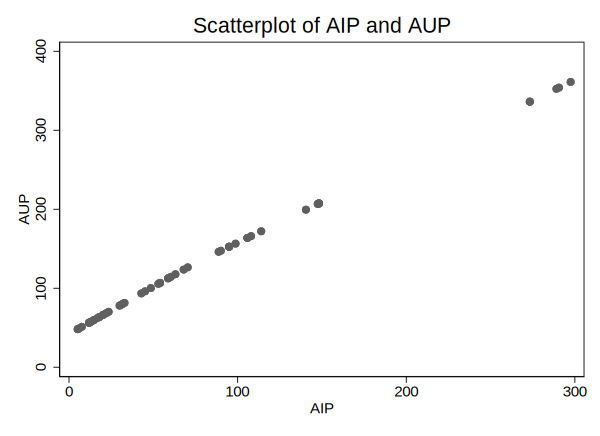






(bin=7, start=5.12, width=41.768571)


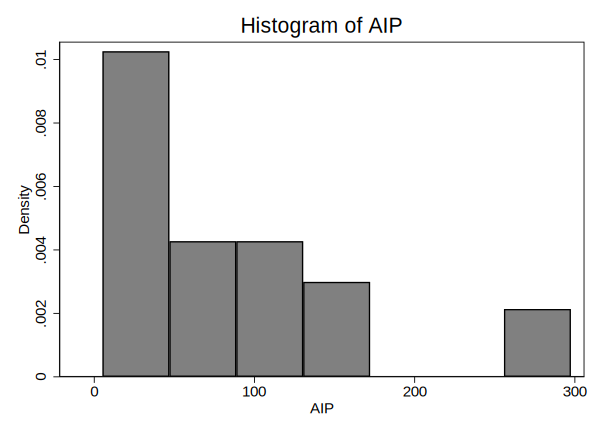

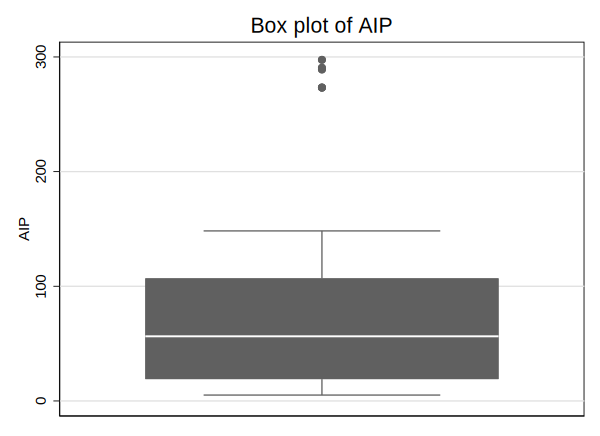

In [23]:
set scheme s1mono // Setting the scheme or style of the graph
scatter AUP AIP if ATCkod == "C10AA01", title("Scatterplot of AIP and AUP")
hist AIP if ATCkod == "C10AA01", title("Histogram of AIP")
graph box AIP if ATCkod == "C10AA01", title("Box plot of AIP")

### Save data for later use

In [24]:
save data/sweden_prices.dta, replace

file data/sweden_prices.dta saved
